# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


## Description

This is a comprehensive Customer Engagement and Churn Analytics Dataset containing behavioral, demographic, and transactional data for 50,000 customers across a global e-commerce/subscription platform. The dataset captures 25 distinct features that provide a 360-degree view of customer interactions and engagement patterns.

## Dataset Characteristics
Records: 50,000 customers
Features: 25 columns
Data Types: Mixed (numerical, categorical, object)
Geographic Coverage: Multiple countries (USA, UK, Germany, Canada, India, Japan, France, Australia)
Time Period: Captures customer journey from signup through current status
Key Feature Categories
Data Quality
Contains some missing values (NaN) in certain columns
Mix of continuous numerical values (e.g., order values, engagement scores)
Categorical variables (Gender, Country, City, Payment methods)
Binary indicator (Churned: 0 = Active, 1 = Churned)
Potential Applications

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [165]:
#Type your code here
import shutil
import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [166]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [167]:
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [168]:
path = kagglehub.dataset_download("dhairyajeetsingh/ecommerce-customer-behavior-dataset")

# Ensure the /content directory exists
if not os.path.exists('/content'):
    os.makedirs('/content')

# Move contents of the downloaded directory to /content
if os.path.isdir(path):
    for item in os.listdir(path):
        s = os.path.join(path, item)
        d = os.path.join('/content', item)
        if os.path.isdir(s):
            shutil.move(s, d)
        else:
            shutil.copy(s, d) # Use copy for files to avoid issues with shutil.move on files across filesystems if any
    print(f"All files and directories from '{path}' moved/copied to '/content'")
else:
    # If path is a single file, move it directly
    shutil.copy(path, '/content/') # Using copy, as move might fail across different filesystems
    print(f"File '{path}' copied to '/content/'")

print("Contents of /content after moving:")
print(os.listdir('/content'))

Using Colab cache for faster access to the 'ecommerce-customer-behavior-dataset' dataset.
All files and directories from '/kaggle/input/ecommerce-customer-behavior-dataset' moved/copied to '/content'
Contents of /content after moving:
['.config', 'after remove outlier.png', 'before remove outlier.png', 'ecommerce_customer_churn_dataset.csv', '.ipynb_checkpoints', 'sample_data']


In [169]:
df = pd.read_csv('/content/ecommerce_customer_churn_dataset.csv')
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [171]:
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,...,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,...,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,...,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,...,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,...,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


In [172]:
df.isna().sum()

,0
Age,2495
Gender,0
Country,0
City,0
Membership_Years,0
Login_Frequency,0
Session_Duration_Avg,3399
Pages_Per_Session,3000
Cart_Abandonment_Rate,0
Wishlist_Items,4000


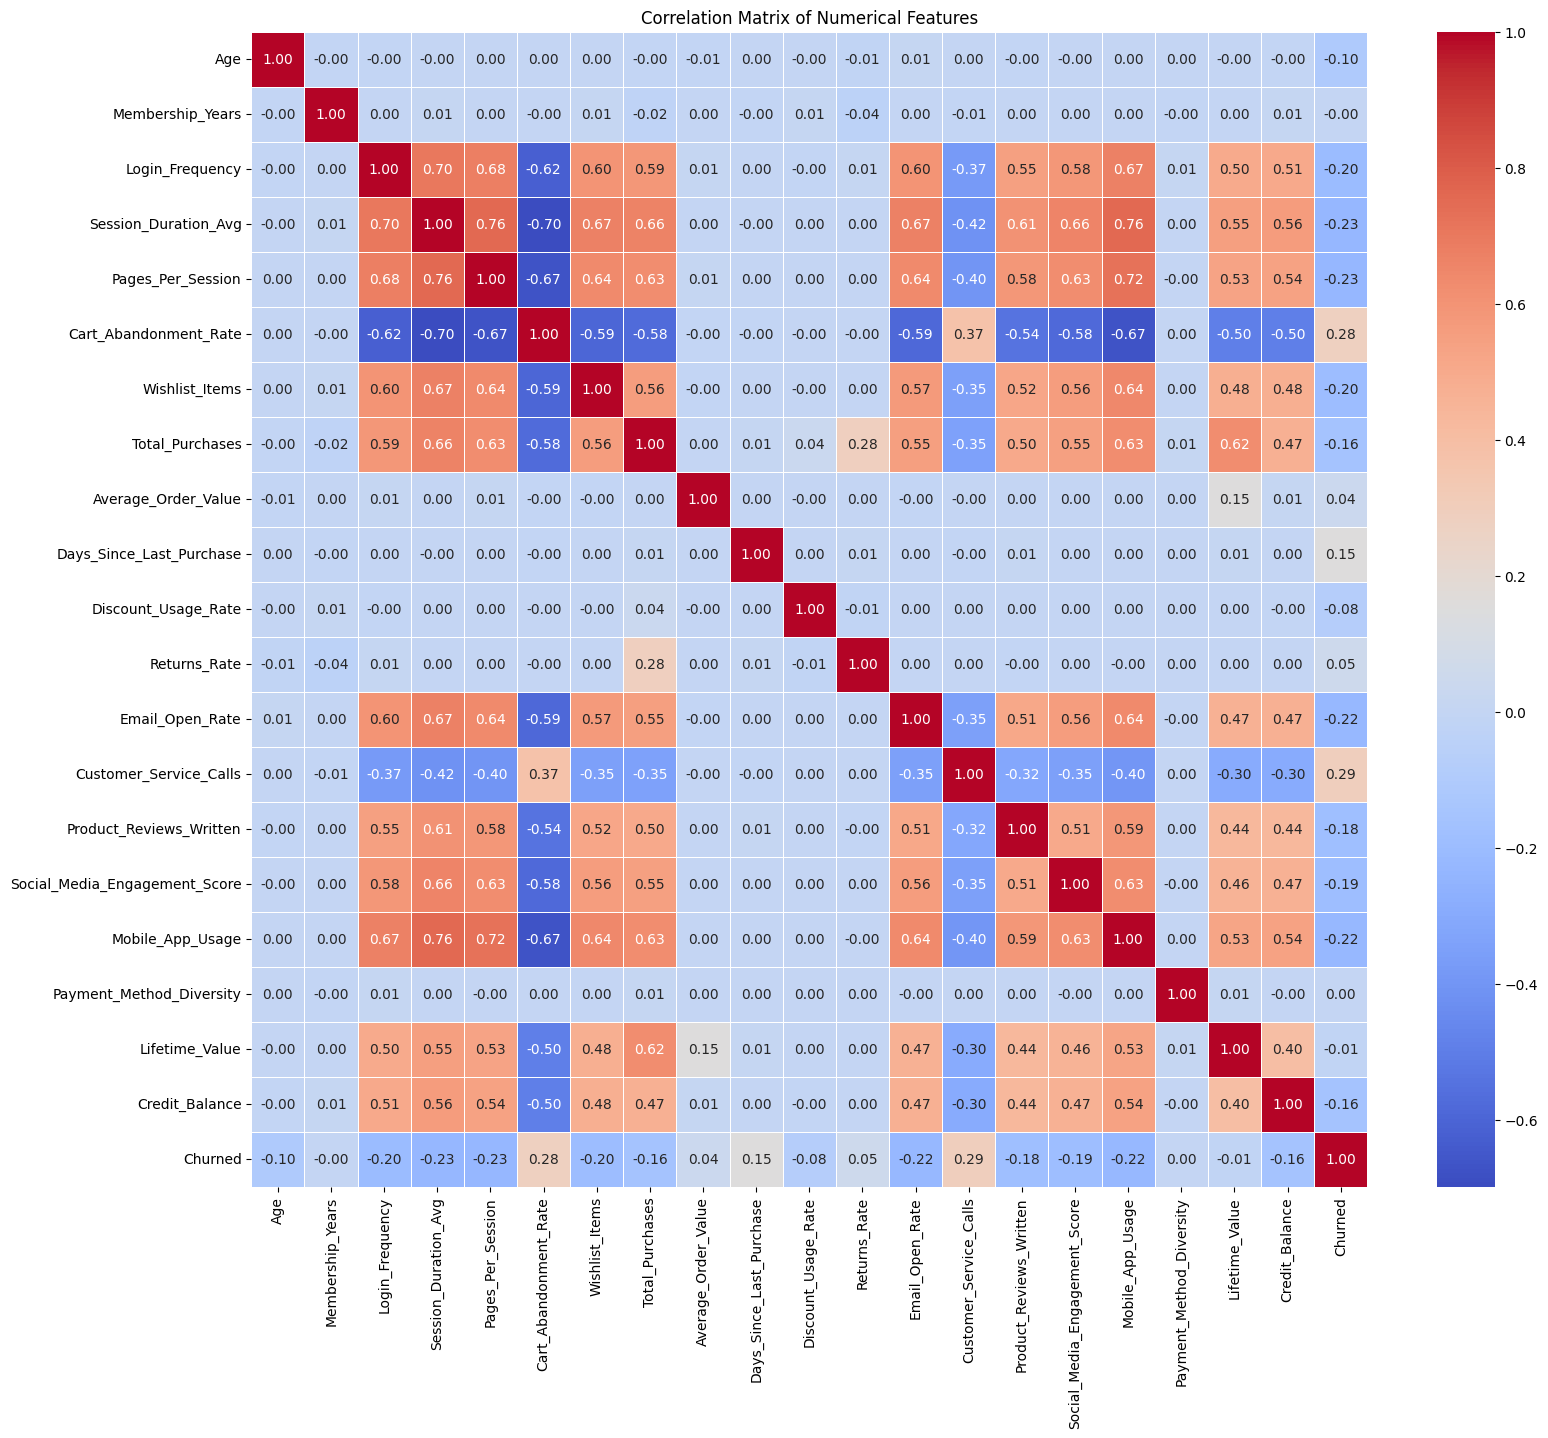

In [173]:
# --- Generate Correlation Heatmap ---
# Select only numerical columns for correlation heatmap
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(18, 15))
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()



/tmp/ipython-input-185725577.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_for_outlier_plot[col].fillna(median_val, inplace=True)


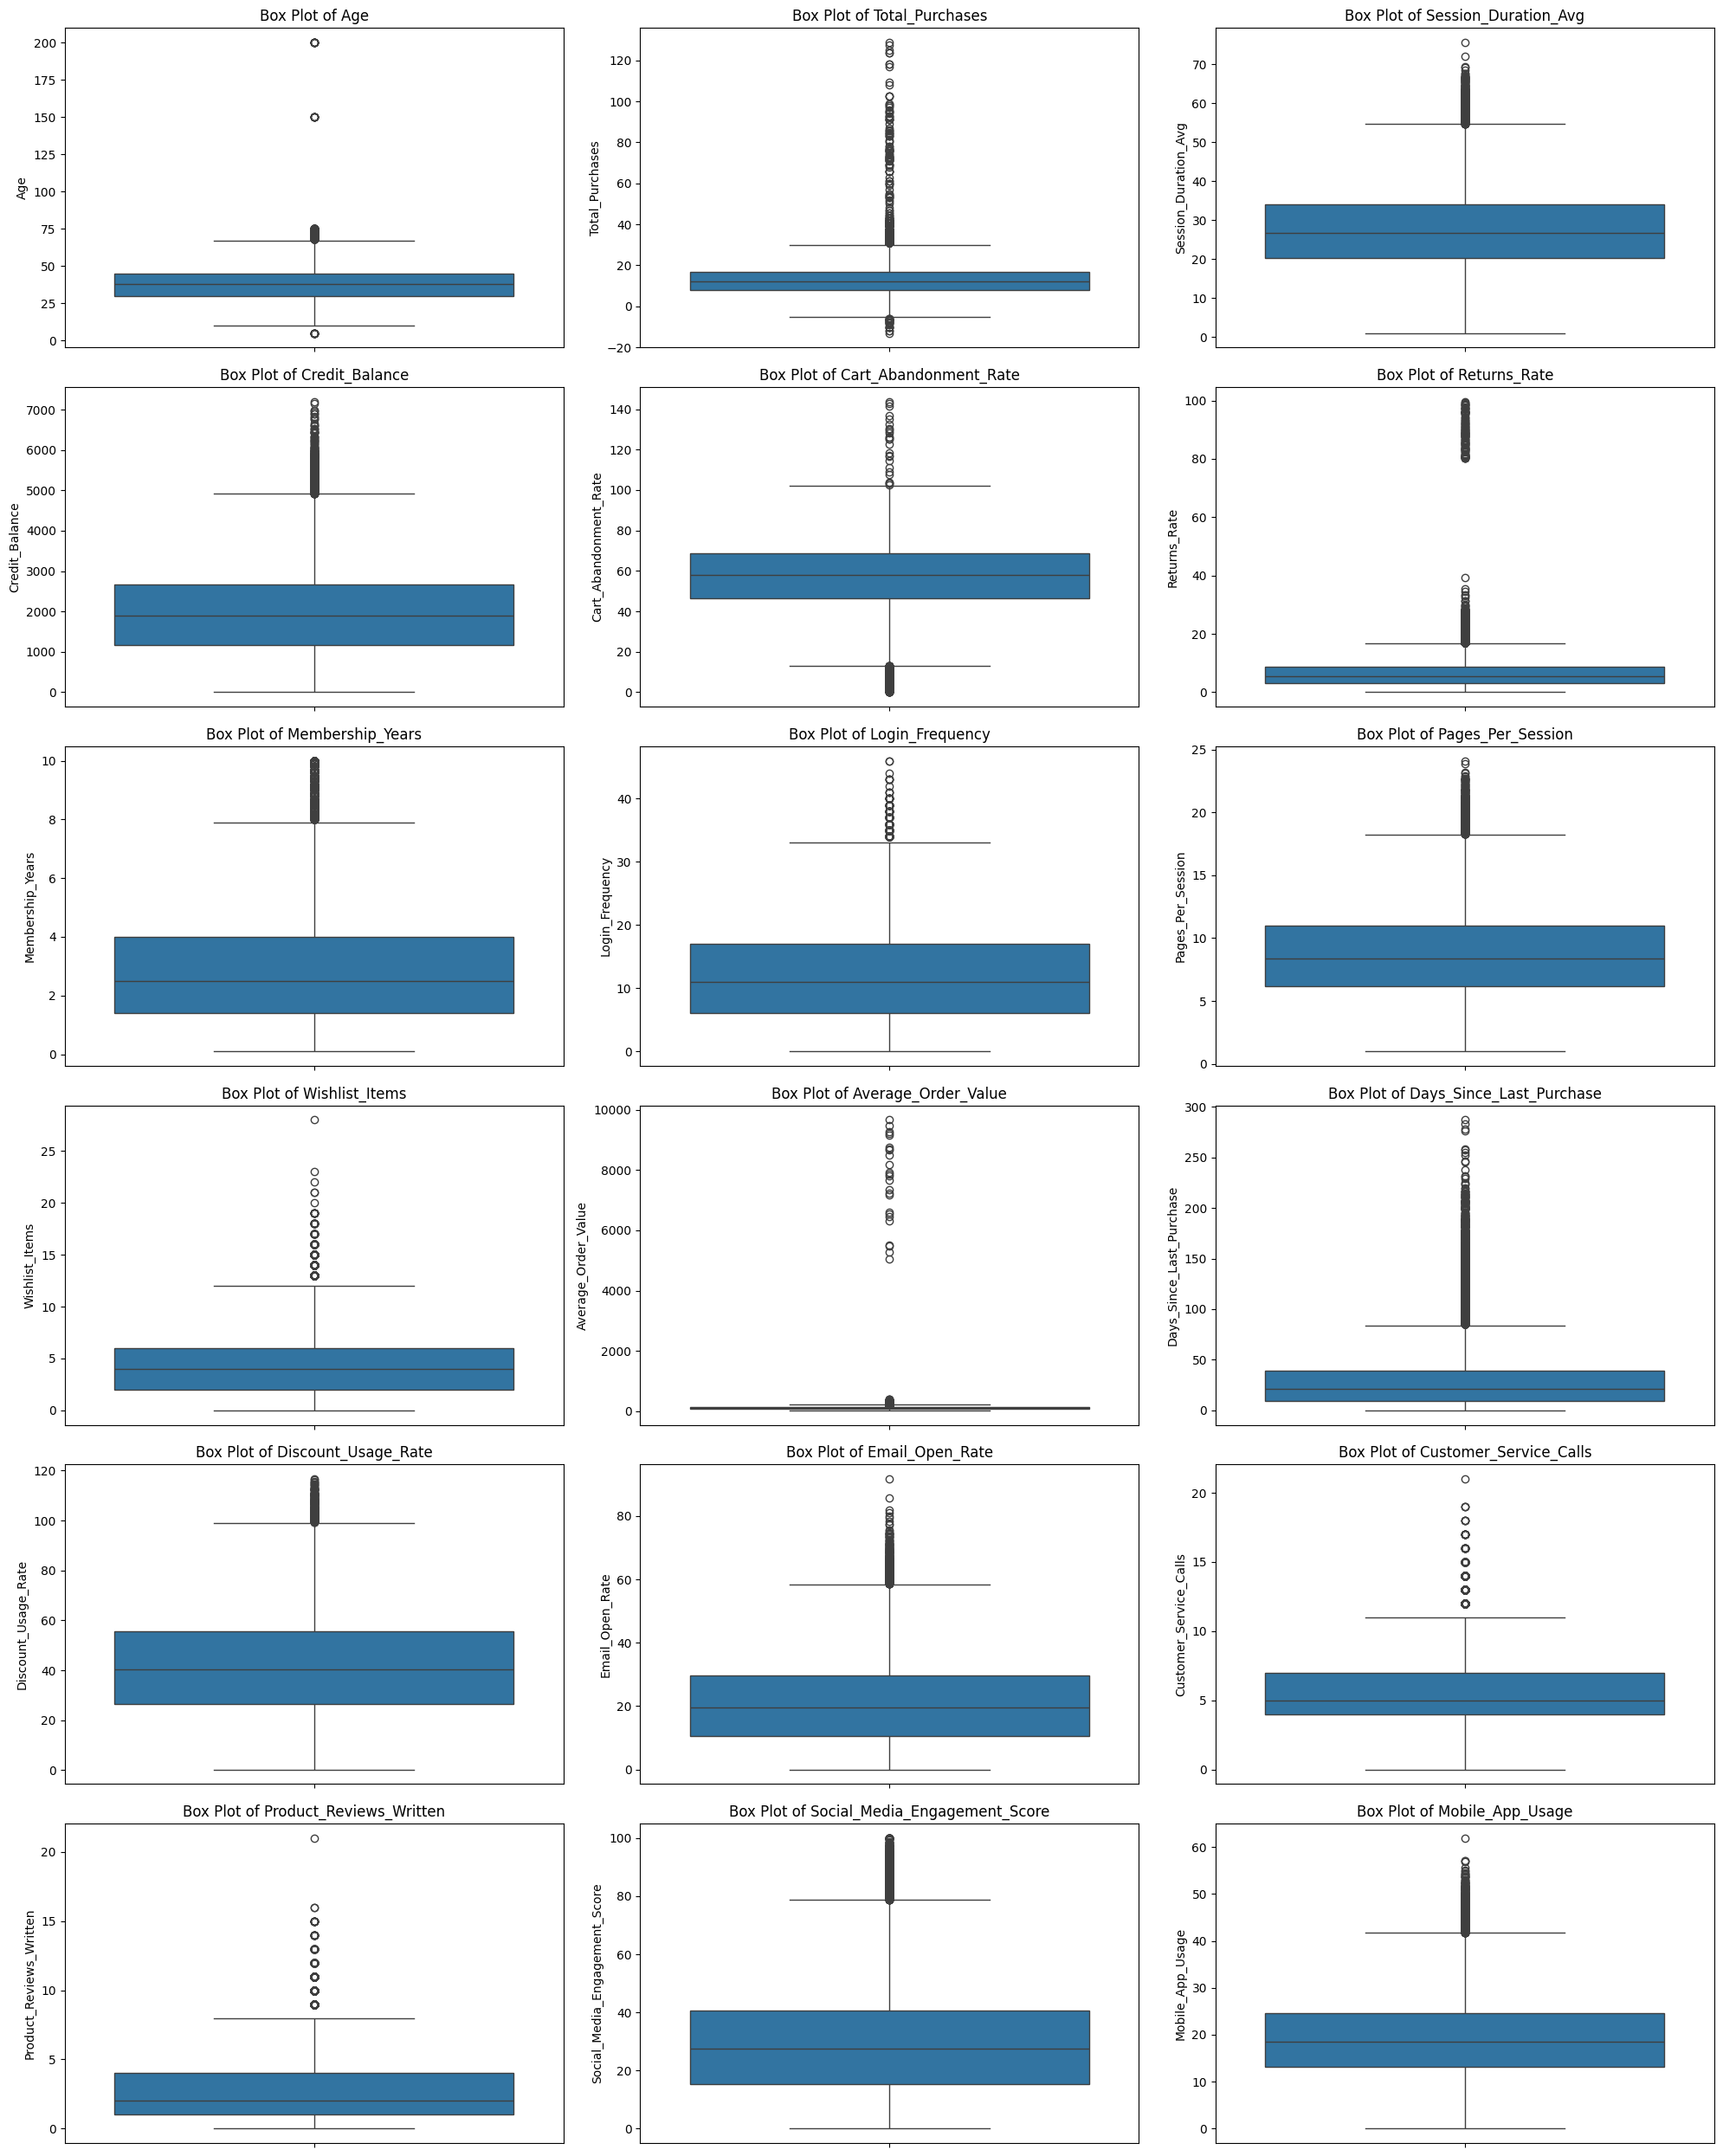

In [174]:
# --- Generate Outlier Graphs (Box Plots) ---
# Identify columns with potential outliers for visualization based on df.describe() and domain knowledge
outlier_cols = [
    'Age', 'Total_Purchases', 'Session_Duration_Avg',
    'Credit_Balance', 'Cart_Abandonment_Rate', 'Returns_Rate',
    'Membership_Years', 'Login_Frequency', 'Pages_Per_Session',
    'Wishlist_Items', 'Average_Order_Value', 'Days_Since_Last_Purchase',
    'Discount_Usage_Rate', 'Email_Open_Rate', 'Customer_Service_Calls',
    'Product_Reviews_Written', 'Social_Media_Engagement_Score', 'Mobile_App_Usage'
]

# Create a copy for plotting to avoid modifying the original df for now
df_for_outlier_plot = df[outlier_cols].copy()

# Fill NaNs with median for visualization purposes in the copy
for col in outlier_cols:
    if df_for_outlier_plot[col].isnull().any():
        median_val = df_for_outlier_plot[col].median()
        df_for_outlier_plot[col].fillna(median_val, inplace=True)

# Plot box plots for outlier visualization
plt.figure(figsize=(20, 25))
for i, col in enumerate(outlier_cols):
    plt.subplot(6, 3, i + 1) # Adjust subplot grid based on number of columns
    seaborn.boxplot(y=df_for_outlier_plot[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

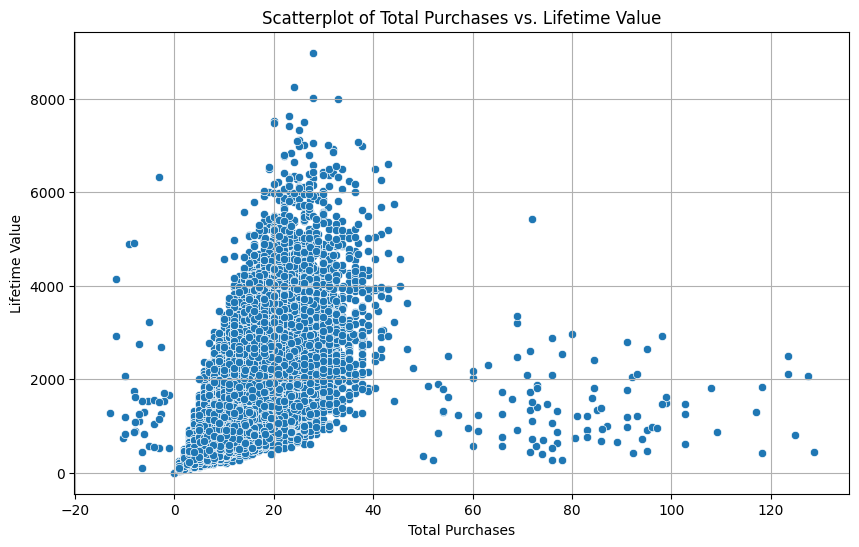

In [175]:
plt.figure(figsize=(10, 6))
seaborn.scatterplot(x='Total_Purchases', y='Lifetime_Value', data=df)
plt.title('Scatterplot of Total Purchases vs. Lifetime Value')
plt.xlabel('Total Purchases')
plt.ylabel('Lifetime Value')
plt.grid(True)
plt.savefig('before remove outlier.png')
plt.show()


In [176]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [177]:
num_cols.tolist()

['Age',
 'Membership_Years',
 'Login_Frequency',
 'Session_Duration_Avg',
 'Pages_Per_Session',
 'Cart_Abandonment_Rate',
 'Wishlist_Items',
 'Total_Purchases',
 'Average_Order_Value',
 'Days_Since_Last_Purchase',
 'Discount_Usage_Rate',
 'Returns_Rate',
 'Email_Open_Rate',
 'Customer_Service_Calls',
 'Product_Reviews_Written',
 'Social_Media_Engagement_Score',
 'Mobile_App_Usage',
 'Payment_Method_Diversity',
 'Lifetime_Value',
 'Credit_Balance',
 'Churned']

In [178]:
cat_cols.tolist()

['Gender', 'Country', 'City', 'Signup_Quarter']

In [179]:
df[cat_cols].head()

,Gender,Country,City,Signup_Quarter
0,Male,France,Marseille,Q1
1,Male,UK,Manchester,Q4
2,Female,Canada,Vancouver,Q4
3,Female,USA,New York,Q1
4,Male,India,Delhi,Q4


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [180]:
df_fix = df.copy()

num_cols_to_fill = df_fix.select_dtypes(include=np.number).columns
cat_cols_to_fill = df_fix.select_dtypes(exclude=np.number).columns

imputer = SimpleImputer(strategy='median')
df_fix[num_cols_to_fill] = imputer.fit_transform(df_fix[num_cols_to_fill])

for col in cat_cols_to_fill:
    if df_fix[col].isnull().any():
        mode_val = df_fix[col].mode()[0]
        df_fix[col].fillna(mode_val, inplace=True)

print("Null values after imputation:")
print(df_fix.isnull().sum())

Null values after imputation:
Age                              0
Gender                           0
Country                          0
City                             0
Membership_Years                 0
Login_Frequency                  0
Session_Duration_Avg             0
Pages_Per_Session                0
Cart_Abandonment_Rate            0
Wishlist_Items                   0
Total_Purchases                  0
Average_Order_Value              0
Days_Since_Last_Purchase         0
Discount_Usage_Rate              0
Returns_Rate                     0
Email_Open_Rate                  0
Customer_Service_Calls           0
Product_Reviews_Written          0
Social_Media_Engagement_Score    0
Mobile_App_Usage                 0
Payment_Method_Diversity         0
Lifetime_Value                   0
Credit_Balance                   0
Churned                          0
Signup_Quarter                   0
dtype: int64


In [181]:
le = LabelEncoder()
df_fix[cat_cols] = df_fix[cat_cols].apply(le.fit_transform)
df_fix[cat_cols].head()

,Gender,Country,City,Signup_Quarter
0,1,2,21,0
1,1,6,20,3
2,0,1,38,3
3,0,7,27,0
4,1,4,9,3


In [182]:
print(f"Original dataset shape: {df.shape}")

# Make a copy of the dataframe to perform outlier removal without affecting the original
df_cleaned = df_fix.copy()

# List of numerical columns to check for outliers based on previous EDA
outlier_cols = num_cols.tolist()

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep rows where the column value is within the bounds
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply outlier removal to each specified column
initial_rows = df_cleaned.shape[0]
for col in outlier_cols:
    # Only apply if the column is numerical and has sufficient non-null values
    if pd.api.types.is_numeric_dtype(df_cleaned[col]) and not df_cleaned[col].isnull().all():
        df_cleaned = remove_outliers_iqr(df_cleaned.dropna(subset=[col]), col)


rows_removed = initial_rows - df_cleaned.shape[0]

print(f"Shape after outlier removal: {df_cleaned.shape}")
print(f"Number of rows removed due to outliers: {rows_removed}")

# Update the main dataframe 'df' with the cleaned version (optional, but good practice if proceeding)
df = df_cleaned.copy()
print("Outliers removed from the dataset. The DataFrame 'df' has been updated.")

Original dataset shape: (50000, 25)
Shape after outlier removal: (35714, 25)
Number of rows removed due to outliers: 14286
Outliers removed from the dataset. The DataFrame 'df' has been updated.


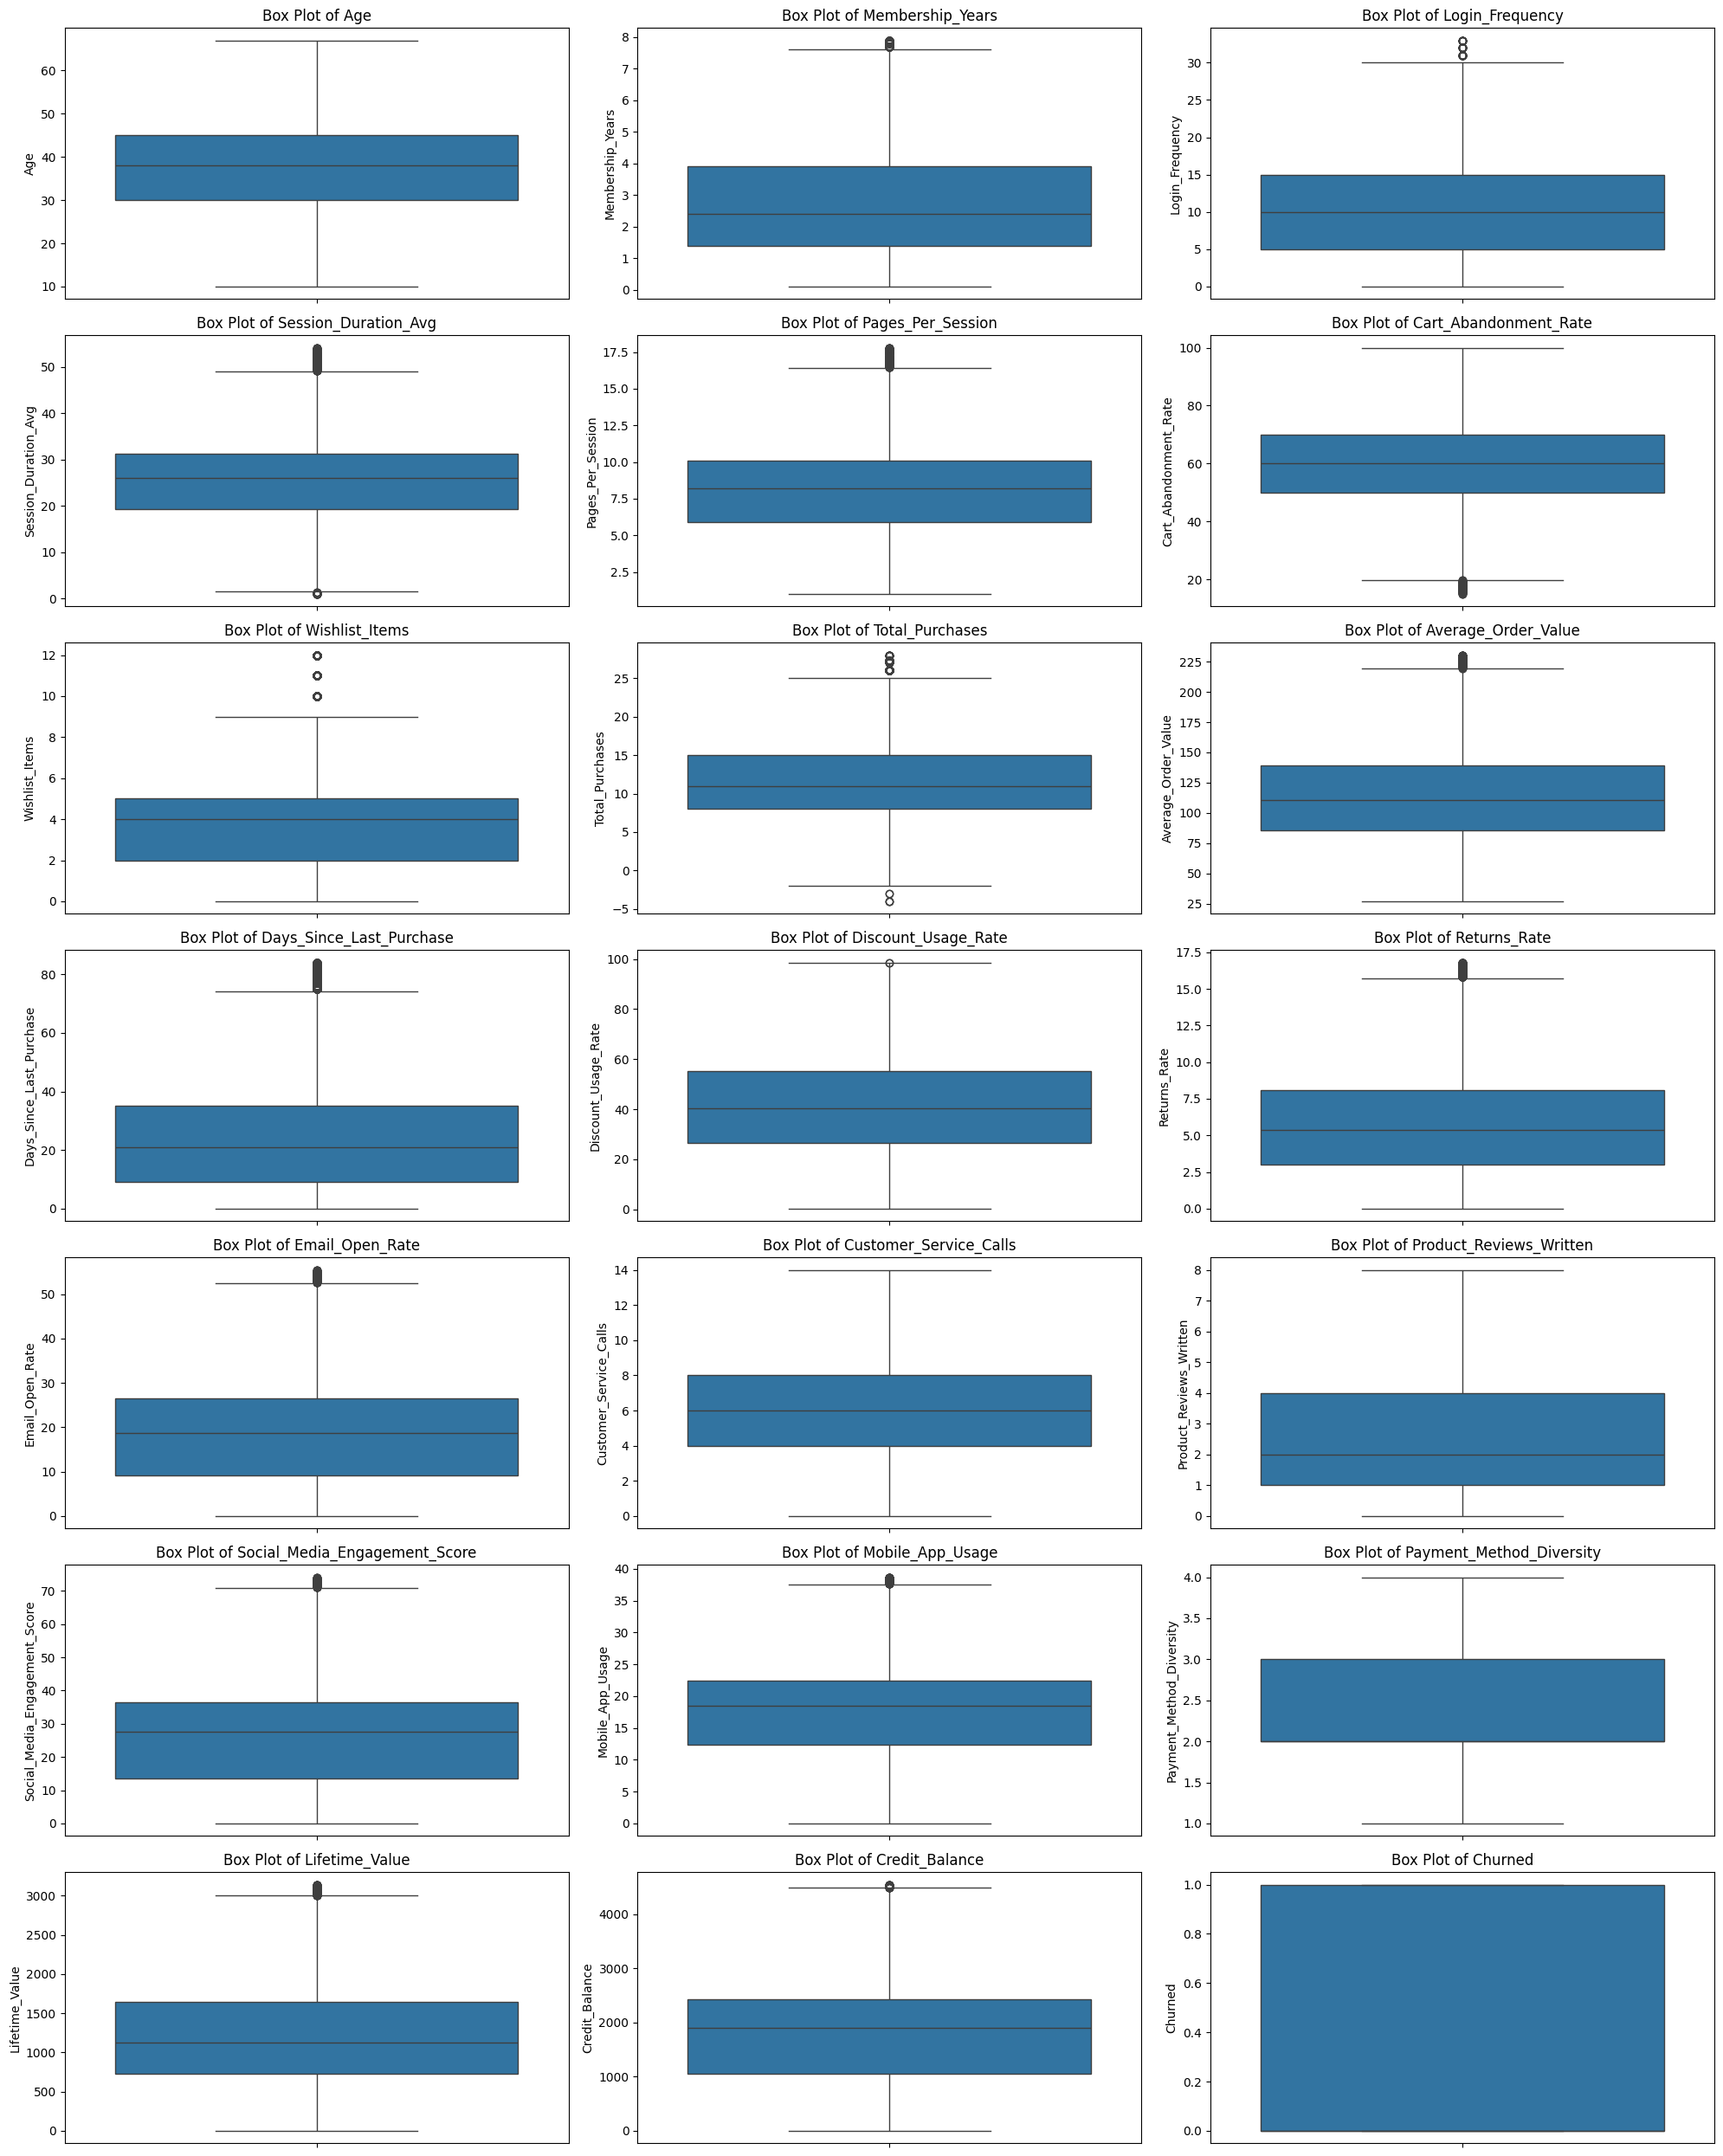

In [183]:
# Fill NaNs with median for visualization purposes in the copy
for col in outlier_cols:
    if df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)

# Plot box plots for outlier visualization
plt.figure(figsize=(20, 25))
for i, col in enumerate(outlier_cols):
    # Adjusted subplot grid to 7 rows and 3 columns to accommodate all 21 outlier_cols
    plt.subplot(7, 3, i + 1)
    seaborn.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

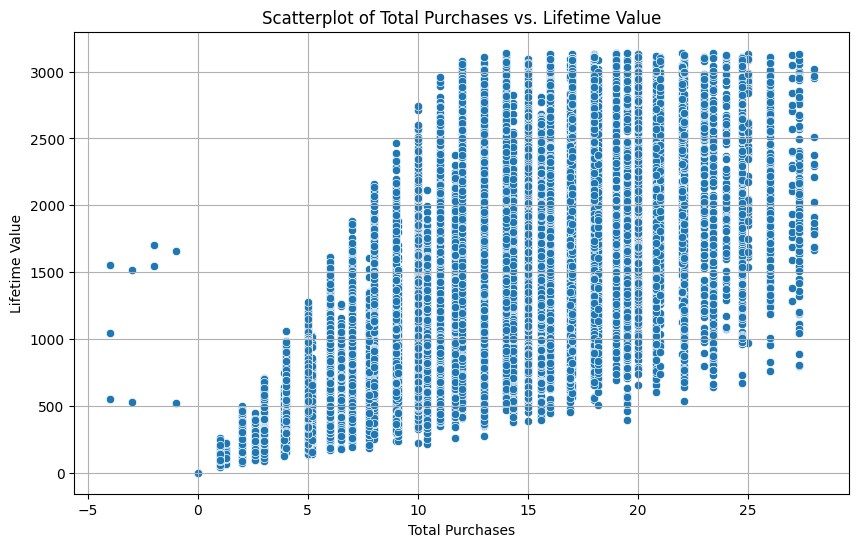

In [184]:
plt.figure(figsize=(10, 6))
seaborn.scatterplot(x='Total_Purchases', y='Lifetime_Value', data=df_cleaned)
plt.title('Scatterplot of Total Purchases vs. Lifetime Value')
plt.xlabel('Total Purchases')
plt.ylabel('Lifetime Value')
plt.grid(True)
plt.savefig('after remove outlier.png')
plt.show()


In [185]:
X = df_cleaned.drop('Churned', axis=1)
y = df_cleaned['Churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)